In [ ]:
!pip install flair

     |████████████████████████████████| 286kB 29.5MB/s 
     |████████████████████████████████| 1.2MB 30.0MB/s 
     |████████████████████████████████| 798kB 32.5MB/s 
     |████████████████████████████████| 983kB 31.8MB/s 
     |████████████████████████████████| 19.7MB 1.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3MB 23.2MB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 901kB 36.1MB/s 
     |████████████████████████████████| 3.3MB 32.4MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-cp37-none-any.whl size=9693 sha256=2da95d1d6e9789ff34a916adbe580afec32046090d4e0987c0b3bb8a2497523e
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Created wheel for mpld3: filename

# Tutorial 1 - NLP Base Types

In [ ]:
# The sentence objects holds a sentence that we may want to embed or tag
from flair.data import Sentence

# Make a sentence object by passing a string
sentence = Sentence('The grass is green.')

# Print the object to see what's in there
print(sentence)

Sentence: "The grass is green ."   [− Tokens: 5]


In [ ]:
# using the token id
print(sentence.get_token(1))
# using the index itself
print(sentence[0])

Token: 1 The
Token: 1 The


In [ ]:
for token in sentence:
    print(token)

Token: 1 The
Token: 2 grass
Token: 3 is
Token: 4 green
Token: 5 .


In [ ]:
# Make a sentence object by passing an untokenized string and the 'use_tokenizer' flag
untokenized_sentence = Sentence('The grass is green.', use_tokenizer=False)

# Print the object to see what's in there
print(untokenized_sentence)

Sentence: "The grass is green."   [− Tokens: 4]


In [ ]:
from flair.tokenization import JapaneseTokenizer

# init japanese tokenizer
tokenizer = JapaneseTokenizer("janome")

# make sentence (and tokenize)
japanese_sentence = Sentence("私はベルリンが好き", use_tokenizer=tokenizer)

# output tokenized sentence
print(japanese_sentence)

Sentence: "私 は ベルリン が 好き"   [− Tokens: 5]


In [ ]:
# add a tag to a word in the sentence
sentence[3].add_tag('ner', 'color')

# print the sentence with all tags of this type
print(sentence.to_tagged_string())

The grass is green <color> .


In [ ]:
# get token 3 in the sentence 
token = sentence[3]

# get the 'ner' tag of the token
tag = token.get_tag('ner')

# print token
print(f'"{token}" is tagged as "{tag.value}" with confidence score "{tag.score}"')

"Token: 4 green" is tagged as "color" with confidence score "1.0"


In [ ]:
sentence = Sentence('France is the current world cup winner.')

# add a label to a sentence
sentence.add_label('topic', 'sports')

print(sentence)

# Alternatively, you can also create a sentence with label in one line
sentence = Sentence('France is the current world cup winner.').add_label('topic', 'sports')

print(sentence)

Sentence: "France is the current world cup winner ."   [− Tokens: 8  − Sentence-Labels: {'topic': [sports (1.0)]}]
Sentence: "France is the current world cup winner ."   [− Tokens: 8  − Sentence-Labels: {'topic': [sports (1.0)]}]


In [ ]:
sentence = Sentence('France is the current world cup winner.')

# this sentence has multiple "topic" labels
sentence.add_label('topic', 'sports')
sentence.add_label('topic', 'soccer')

# this sentence has a "language" labels
sentence.add_label('language', 'English')

print(sentence)

Sentence: "France is the current world cup winner ."   [− Tokens: 8  − Sentence-Labels: {'topic': [sports (1.0), soccer (1.0)], 'language': [English (1.0)]}]


Acessando as Labels das Sentenças





In [ ]:
for label in sentence.labels:
    print(label)

sports (1.0)
soccer (1.0)
English (1.0)


In [ ]:
print(sentence.to_plain_string())
for label in sentence.labels:
    print(f' - classified as "{label.value}" with score {label.score}')

France is the current world cup winner.
 - classified as "sports" with score 1.0
 - classified as "soccer" with score 1.0
 - classified as "English" with score 1.0


Somente as Labels do Tópico

In [ ]:
for label in sentence.get_labels('topic'):
    print(label)

sports (1.0)
soccer (1.0)


#Tutorial 2 - Tagging your Text


In [ ]:
from flair.models import SequenceTagger

tagger = SequenceTagger.load('ner')

2021-05-12 17:18:50,916 --------------------------------------------------------------------------------
2021-05-12 17:18:50,921 The model key 'ner' now maps to 'https://huggingface.co/flair/ner-english' on the HuggingFace ModelHub
2021-05-12 17:18:50,923  - The most current version of the model is automatically downloaded from there.
2021-05-12 17:18:50,927  - (you can alternatively manually download the original model at https://nlp.informatik.hu-berlin.de/resources/models/ner/en-ner-conll03-v0.4.pt)
2021-05-12 17:18:50,930 --------------------------------------------------------------------------------



2021-05-12 17:19:05,385 loading file /root/.flair/models/ner-english/4f4cdab26f24cb98b732b389e6cebc646c36f54cfd6e0b7d3b90b25656e4262f.8baa8ae8795f4df80b28e7f7b61d788ecbb057d1dc85aacb316f1bd02837a4a4


In [ ]:
# sentence = Sentence('George Washington went to Washington .')
sentence = Sentence('My name is Arthur Galdino and i live in Goiânia')

# predict NER tags
tagger.predict(sentence)

# print sentence with predicted tags
print(sentence.to_tagged_string())

My name is Arthur <B-PER> Galdino <E-PER> and i live in Goiânia <S-LOC>


In [ ]:
saida = []
for token in sentence:
  tag = token.get_tag('ner')
  saida += ["".join(tag.value)]

In [ ]:
saida

['O', 'O', 'O', 'B-PER', 'E-PER', 'O', 'O', 'O', 'O', 'S-LOC']

In [ ]:
for entity in sentence.get_spans('ner'):
    print(entity)

Span [4,5]: "Arthur Galdino"   [− Labels: PER (0.9967)]
Span [10]: "Goiânia"   [− Labels: LOC (0.9907)]


In [ ]:
print(sentence.to_dict(tag_type='ner'))

{'text': 'My name is Arthur Galdino and i live in Goiânia', 'labels': [], 'entities': [{'text': 'Arthur Galdino', 'start_pos': 11, 'end_pos': 25, 'labels': [PER (0.9967)]}, {'text': 'Goiânia', 'start_pos': 40, 'end_pos': 47, 'labels': [LOC (0.9907)]}]}


Tagger tanto para a tarefa de NER quanto para a de POS

In [ ]:
from flair.models import MultiTagger

# load tagger for POS and NER 
tagger = MultiTagger.load(['pos', 'ner'])

# make example sentence
sentence = Sentence("George Washington went to Washington.")

# predict with both models
tagger.predict(sentence)

print(sentence)

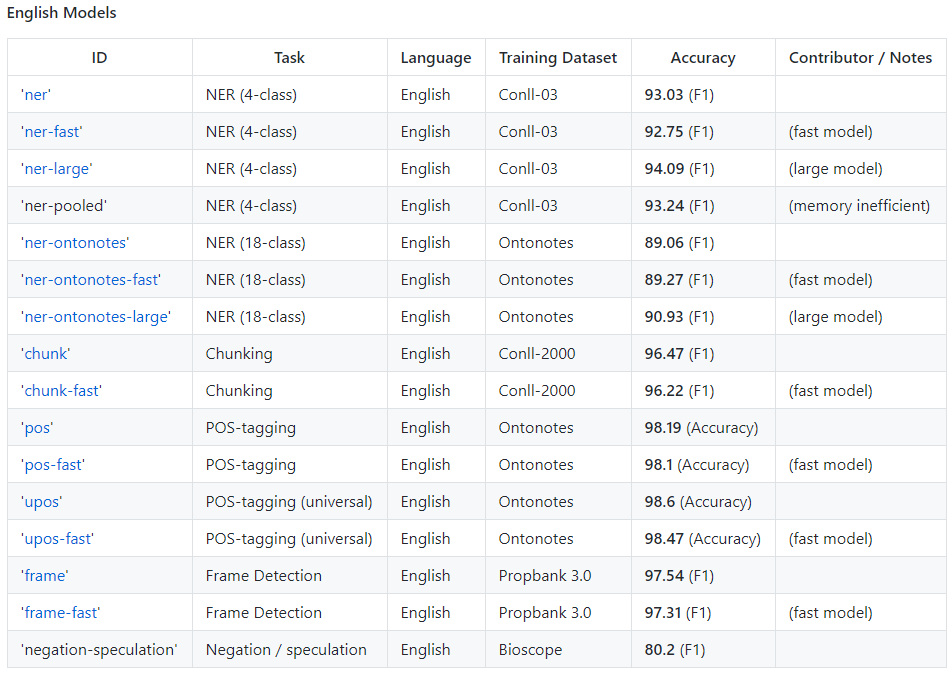

In [ ]:
# load model
# tagger = SequenceTagger.load('de-ner')

tagger = SequenceTagger.load('pt-pos-clinical')

# make German sentence
sentence = Sentence('Arthur Galdino é um deus que vive na terra.')

# predict NER tags
tagger.predict(sentence)

# print sentence with predicted tags
print(sentence.to_tagged_string())

2021-05-11 16:10:26,590 https://nlp.informatik.hu-berlin.de/resources/models/pt-pos-clinical/pucpr-flair-clinical-pos-tagging-best-model.pt not found in cache, downloading to /tmp/tmpif3i57rq


100%|██████████| 249006108/249006108 [00:10<00:00, 23700568.04B/s]

2021-05-11 16:10:37,524 copying /tmp/tmpif3i57rq to cache at /root/.flair/models/pucpr-flair-clinical-pos-tagging-best-model.pt


2021-05-11 16:10:38,495 removing temp file /tmp/tmpif3i57rq
2021-05-11 16:10:38,533 loading file /root/.flair/models/pucpr-flair-clinical-pos-tagging-best-model.pt
Arthur <NNP> Galdino <NNP> é <VB> um <CD> deus <NN> que <IN> vive <VB> na <IN> terra <NN> . <.>


Tagging a List of Sentences

In [ ]:
from flair.models import SequenceTagger
from flair.tokenization import SegtokSentenceSplitter

# example text with many sentences
text = "This is a sentence. This is another sentence. I love Berlin. I love Arthur."

# initialize sentence splitter
splitter = SegtokSentenceSplitter()

# use splitter to split text into list of sentences
sentences = splitter.split(text)

# predict tags for sentences
tagger = SequenceTagger.load('ner')
tagger.predict(sentences)

# iterate through sentences and print predicted labels
for sentence in sentences:
    print(sentence.to_tagged_string())

2021-05-11 16:12:29,734 --------------------------------------------------------------------------------
2021-05-11 16:12:29,735 The model key 'ner' now maps to 'https://huggingface.co/flair/ner-english' on the HuggingFace ModelHub
2021-05-11 16:12:29,738  - The most current version of the model is automatically downloaded from there.
2021-05-11 16:12:29,741  - (you can alternatively manually download the original model at https://nlp.informatik.hu-berlin.de/resources/models/ner/en-ner-conll03-v0.4.pt)
2021-05-11 16:12:29,745 --------------------------------------------------------------------------------
2021-05-11 16:12:29,935 loading file /root/.flair/models/ner-english/4f4cdab26f24cb98b732b389e6cebc646c36f54cfd6e0b7d3b90b25656e4262f.8baa8ae8795f4df80b28e7f7b61d788ecbb057d1dc85aacb316f1bd02837a4a4
This is a sentence .
This is another sentence .
I love Berlin <S-LOC> .
I love Arthur <S-PER> .


In [ ]:
from flair.models import TextClassifier
# load tagger
classifier = TextClassifier.load('sentiment')

# predict for example sentence
sentence = Sentence("I'm friends with the monster that's under my bed")
classifier.predict(sentence)

# check prediction
print(sentence)

2021-05-11 16:19:46,852 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt
Sentence: "I 'm friends with the monster that 's under my bed"   [− Tokens: 11  − Sentence-Labels: {'label': [POSITIVE (0.9994)]}]


# Tutorial 3 - Word Embeddings

In [ ]:
from flair.embeddings import WordEmbeddings
from flair.data import Sentence

# init embedding
glove_embedding = WordEmbeddings('glove')

2021-05-12 14:15:18,540 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmpixdt_r7c


100%|██████████| 160000128/160000128 [00:17<00:00, 9091467.17B/s]

2021-05-12 14:15:36,971 copying /tmp/tmpixdt_r7c to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2021-05-12 14:15:37,469 removing temp file /tmp/tmpixdt_r7c
2021-05-12 14:15:38,944 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to /tmp/tmptwlfy4bl


100%|██████████| 21494764/21494764 [00:04<00:00, 4666955.27B/s]

2021-05-12 14:15:44,388 copying /tmp/tmptwlfy4bl to cache at /root/.flair/embeddings/glove.gensim
2021-05-12 14:15:44,417 removing temp file /tmp/tmptwlfy4bl


In [ ]:
# create sentence.
sentence = Sentence('The grass is green .')

# embed a sentence using glove.
glove_embedding.embed(sentence)

# now check out the embedded tokens.
for token in sentence:
    print(token)
    print(token.embedding)

Token: 1 The
tensor([-0.0382, -0.2449,  0.7281, -0.3996,  0.0832,  0.0440, -0.3914,  0.3344,
        -0.5755,  0.0875,  0.2879, -0.0673,  0.3091, -0.2638, -0.1323, -0.2076,
         0.3340, -0.3385, -0.3174, -0.4834,  0.1464, -0.3730,  0.3458,  0.0520,
         0.4495, -0.4697,  0.0263, -0.5415, -0.1552, -0.1411, -0.0397,  0.2828,
         0.1439,  0.2346, -0.3102,  0.0862,  0.2040,  0.5262,  0.1716, -0.0824,
        -0.7179, -0.4153,  0.2033, -0.1276,  0.4137,  0.5519,  0.5791, -0.3348,
        -0.3656, -0.5486, -0.0629,  0.2658,  0.3020,  0.9977, -0.8048, -3.0243,
         0.0125, -0.3694,  2.2167,  0.7220, -0.2498,  0.9214,  0.0345,  0.4674,
         1.1079, -0.1936, -0.0746,  0.2335, -0.0521, -0.2204,  0.0572, -0.1581,
        -0.3080, -0.4162,  0.3797,  0.1501, -0.5321, -0.2055, -1.2526,  0.0716,
         0.7056,  0.4974, -0.4206,  0.2615, -1.5380, -0.3022, -0.0734, -0.2831,
         0.3710, -0.2522,  0.0162, -0.0171, -0.3898,  0.8742, -0.7257, -0.5106,
        -0.5203, -0.1459,  

In [ ]:
from flair.embeddings import FlairEmbeddings

# init embedding
flair_embedding_forward = FlairEmbeddings('news-forward')

# create a sentence
sentence = Sentence('The grass is green .')

# embed words in sentence
flair_embedding_forward.embed(sentence)

for token in sentence:
    print(token)
    print(token.embedding)

Token: 1 The
tensor([-0.0021,  0.0005,  0.0469,  ..., -0.0004, -0.0393,  0.0106])
Token: 2 grass
tensor([-0.0006,  0.0047,  0.0248,  ..., -0.0004, -0.0236,  0.0117])
Token: 3 is
tensor([ 0.0011, -0.0032,  0.0156,  ..., -0.0061,  0.0112,  0.0100])
Token: 4 green
tensor([-0.0034,  0.0003,  0.0256,  ..., -0.0026, -0.0118,  0.0455])
Token: 5 .
tensor([ 0.0008,  0.0002,  0.1262,  ..., -0.0002,  0.0039,  0.0058])


In [ ]:
from flair.embeddings import WordEmbeddings, FlairEmbeddings

# init standard GloVe embedding
glove_embedding = WordEmbeddings('glove')

# init Flair forward and backwards embeddings
flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')

2021-05-12 14:22:21,008 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmpa0ycfo5c


100%|██████████| 73034575/73034575 [00:10<00:00, 7010067.33B/s]

2021-05-12 14:22:32,252 copying /tmp/tmpa0ycfo5c to cache at /root/.flair/embeddings/news-backward-0.4.1.pt
2021-05-12 14:22:32,409 removing temp file /tmp/tmpa0ycfo5c


In [ ]:
from flair.embeddings import StackedEmbeddings

# create a StackedEmbedding object that combines glove and forward/backward flair embeddings
stacked_embeddings = StackedEmbeddings([
                                        glove_embedding,
                                        flair_embedding_forward,
                                        flair_embedding_backward,
                                       ])

In [ ]:
sentence = Sentence('The grass is green .')

# just embed a sentence using the StackedEmbedding as you would with any single embedding.
stacked_embeddings.embed(sentence)

# now check out the embedded tokens.
for token in sentence:
    print(token)
    print(token.embedding)

Token: 1 The
tensor([-0.0382, -0.2449,  0.7281,  ..., -0.0065, -0.0053,  0.0090])
Token: 2 grass
tensor([-0.8135,  0.9404, -0.2405,  ...,  0.0354, -0.0255, -0.0143])
Token: 3 is
tensor([-5.4264e-01,  4.1476e-01,  1.0322e+00,  ..., -5.3691e-04,
        -9.6750e-03, -2.7541e-02])
Token: 4 green
tensor([-0.6791,  0.3491, -0.2398,  ..., -0.0007, -0.1333,  0.0161])
Token: 5 .
tensor([-0.3398,  0.2094,  0.4635,  ...,  0.0005, -0.0177,  0.0032])


Word Embedding Português

In [ ]:
from flair.embeddings import WordEmbeddings
from flair.embeddings import ELMoEmbeddings
from flair.data import Sentence
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings

sentence = Sentence('Meu nome é arthur e eu sou muito bom')

# pt_embedding = WordEmbeddings('pt')
# pt_embedding = WordEmbeddings('pt-crawl')
# pt_embedding = ELMoEmbeddings('pt')

# pt_embeddings = StackedEmbeddings([
#                                         WordEmbeddings('pt'),
#                                         FlairEmbeddings('pt-forward'),
#                                         FlairEmbeddings('pt-backward'),
#                                        ])

pt_embedding.embed(sentence)

# now check out the embedded tokens.
for token in sentence:
    print(token)
    print(token.embedding)

2021-05-18 14:45:21,381 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-pt-forward.pt not found in cache, downloading to /tmp/tmp5p03ihzy


100%|██████████| 72819080/72819080 [00:03<00:00, 22537616.28B/s]

2021-05-18 14:45:24,982 copying /tmp/tmp5p03ihzy to cache at /root/.flair/embeddings/lm-pt-forward.pt


2021-05-18 14:45:25,083 removing temp file /tmp/tmp5p03ihzy
2021-05-18 14:45:27,105 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-pt-backward.pt not found in cache, downloading to /tmp/tmpaap12f1k


100%|██████████| 72819080/72819080 [00:03<00:00, 21272555.88B/s]

2021-05-18 14:45:30,885 copying /tmp/tmpaap12f1k to cache at /root/.flair/embeddings/lm-pt-backward.pt


2021-05-18 14:45:31,340 removing temp file /tmp/tmpaap12f1k
Token: 1 Meu
tensor([-0.8951, -0.5609, -0.0852,  ...,  0.4859, -0.5663,  0.9062])
Token: 2 nome
tensor([-0.6907,  0.0200, -0.5290,  ...,  0.1310, -0.1836,  0.3492])
Token: 3 é
tensor([ 0.2256,  0.6085, -0.2507,  ...,  1.2481, -0.8597,  0.4106])
Token: 4 arthur
tensor([ 0.0054,  0.0954,  0.3567,  ..., -0.0270, -0.6022,  1.4005])
Token: 5 e
tensor([ 0.0053,  0.4241, -0.9500,  ...,  0.3564, -0.4400,  0.8342])
Token: 6 eu
tensor([ 0.4666, -0.3341,  0.6365,  ...,  1.0185, -0.1091,  0.6690])
Token: 7 sou
tensor([ 0.2473,  0.8665, -0.6154,  ...,  1.6333, -0.6519, -0.2012])
Token: 8 muito
tensor([-0.0223,  0.4355, -0.1205,  ...,  0.4909, -1.0182,  0.9636])
Token: 9 bom
tensor([-0.4188, -0.0912,  0.8103,  ...,  1.3804, -0.4125,  0.8357])


In [ ]:
!pip install allennlp==0.9.0

     |████████████████████████████████| 7.6MB 24.0MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 5.6MB 30.7MB/s 
     |████████████████████████████████| 122kB 42.7MB/s 
     |████████████████████████████████| 245kB 39.0MB/s 
     |████████████████████████████████| 102kB 8.3MB/s 
     |████████████████████████████████| 266kB 35.4MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 133kB 38.7MB/s 
     |████████████████████████████████| 163kB 40.3MB/s 
     |████████████████████████████████| 30.8MB 100kB/s 
     |████████████████████████████████| 256kB 38.9MB/s 
     |████████████████████████████████| 153kB 42.3MB/s 
     |████████████████████████████████| 7.5MB 29.6MB/s 
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 2.1MB 35.9MB/s 
     |████████████████████████████████| 3.2MB 31.5MB/s 
     |████████████████████████████████| 92kB 7.8MB/s 
 

# Tutorial 4: List of All Word Embeddings

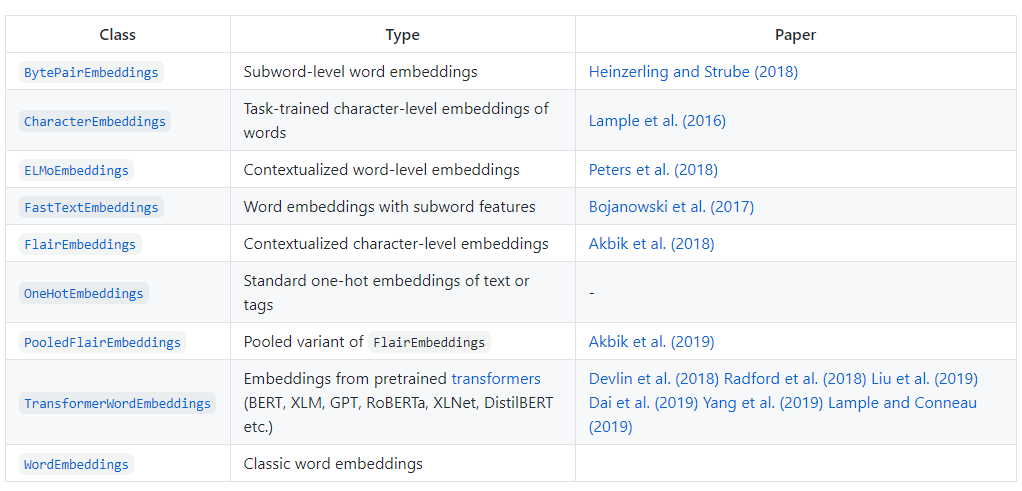

In [ ]:
from flair.embeddings import FlairEmbeddings, TransformerWordEmbeddings

# init Flair embeddings
flair_forward_embedding = FlairEmbeddings('multi-forward')
flair_backward_embedding = FlairEmbeddings('multi-backward')

# init multilingual BERT
bert_embedding = TransformerWordEmbeddings('bert-base-multilingual-cased')

2021-05-12 14:26:43,189 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-jw300-forward-v0.1.pt not found in cache, downloading to /tmp/tmphghfghnc


100%|██████████| 172513724/172513724 [00:21<00:00, 8205549.76B/s]

2021-05-12 14:27:05,048 copying /tmp/tmphghfghnc to cache at /root/.flair/embeddings/lm-jw300-forward-v0.1.pt


2021-05-12 14:27:05,603 removing temp file /tmp/tmphghfghnc
2021-05-12 14:27:07,316 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-jw300-backward-v0.1.pt not found in cache, downloading to /tmp/tmpgil_nbpv


100%|██████████| 172513724/172513724 [00:20<00:00, 8222726.52B/s]

2021-05-12 14:27:29,121 copying /tmp/tmpgil_nbpv to cache at /root/.flair/embeddings/lm-jw300-backward-v0.1.pt


2021-05-12 14:27:29,624 removing temp file /tmp/tmpgil_nbpv


In [ ]:
from flair.embeddings import StackedEmbeddings

# now create the StackedEmbedding object that combines all embeddings
stacked_embeddings = StackedEmbeddings(
    embeddings=[flair_forward_embedding, flair_backward_embedding, bert_embedding])

In [ ]:
sentence = Sentence('The grass is green .')

# just embed a sentence using the StackedEmbedding as you would with any single embedding.
stacked_embeddings.embed(sentence)

# now check out the embedded tokens.
for token in sentence:
    print(token)
    print(token.embedding)

Token: 1 The
tensor([ 0.6800,  0.2429,  0.0012,  ...,  0.7343, -0.0732,  0.1896])
Token: 2 grass
tensor([ 2.9200e-01,  2.2066e-02,  4.5290e-05,  ...,  9.8494e-01,
        -5.7341e-01,  6.8034e-01])
Token: 3 is
tensor([-0.5447,  0.0229,  0.0078,  ..., -0.2840, -0.1061, -0.0851])
Token: 4 green
tensor([0.1477, 0.1097, 0.0009,  ..., 0.0203, 0.5680, 0.0867])
Token: 5 .
tensor([-1.5555e-01,  6.7598e-03,  5.3829e-06,  ..., -4.0763e-01,
         1.7429e-01,  3.1956e-02])


# Tutorial 5: Document Embeddings

In [ ]:
from flair.embeddings import WordEmbeddings, DocumentPoolEmbeddings

# initialize the word embeddings
glove_embedding = WordEmbeddings('glove')

# initialize the document embeddings, mode = mean
document_embeddings = DocumentPoolEmbeddings([glove_embedding])

In [ ]:
# create an example sentence
sentence = Sentence('The grass is green . And the sky is blue .')

# embed the sentence with our document embedding
document_embeddings.embed(sentence)

# now check out the embedded sentence.
print(sentence.embedding)

tensor([-3.1970e-01,  2.6206e-01,  4.0371e-01, -4.8223e-01,  2.1118e-01,
         8.5380e-02, -6.0909e-02,  2.2149e-01, -2.4234e-01, -1.0128e-01,
         8.6213e-02, -1.6874e-01,  3.4736e-01,  6.7267e-02,  2.2750e-01,
        -2.5534e-01,  3.9017e-01,  9.6975e-03, -9.5909e-03,  2.8388e-02,
        -3.2033e-02, -5.7822e-03,  2.8569e-01,  4.0082e-02,  5.8185e-01,
         2.3183e-01,  5.9500e-02, -5.7468e-01, -2.0337e-01, -1.7826e-01,
        -1.8182e-01,  4.7222e-01,  9.8503e-02,  1.0854e-01,  1.9359e-01,
         2.9041e-01,  1.5739e-04,  4.3389e-01,  1.8119e-01, -1.1405e-01,
        -3.4222e-01, -4.9730e-01,  1.6268e-02, -1.8057e-01,  2.5105e-02,
         1.4868e-02,  2.3021e-01, -8.9935e-02, -4.4742e-02, -5.3620e-01,
        -1.3269e-01, -1.3503e-01,  2.4511e-01,  1.2051e+00, -4.5334e-01,
        -2.6632e+00,  2.7964e-02,  4.9859e-02,  1.5550e+00,  5.0574e-01,
        -8.0093e-02,  6.9114e-01, -1.5679e-01,  2.3944e-01,  9.0704e-01,
        -1.1536e-01,  3.8778e-01,  6.8844e-02,  3.2

In [ ]:
from flair.embeddings import WordEmbeddings, DocumentRNNEmbeddings

glove_embedding = WordEmbeddings('glove')

document_embeddings = DocumentRNNEmbeddings([glove_embedding])

In [ ]:
# create an example sentence
sentence = Sentence('The grass is green . And the sky is blue .')

# embed the sentence with our document embedding
document_embeddings.embed(sentence)

# now check out the embedded sentence.
print(sentence.get_embedding())

tensor([-2.5879e-01, -1.1177e-04,  4.5241e-01,  1.9640e-02, -1.8759e-01,
        -1.3157e-01,  2.0852e-01, -1.0687e-01, -4.1924e-02,  2.5689e-01,
         1.8635e-01,  2.0998e-01,  9.6888e-03,  1.1393e-01, -1.2085e-01,
        -3.9704e-03, -3.3668e-01,  5.8235e-01,  2.8079e-02,  1.5337e-01,
        -2.8852e-01,  2.1676e-01,  1.7850e-01,  2.8997e-01,  1.7192e-01,
        -3.4198e-01,  2.7954e-01,  1.0824e-01,  3.5902e-02,  2.2384e-01,
         2.5850e-01,  1.1321e-01, -2.0888e-01,  1.4699e-01, -6.1434e-01,
         1.0027e-01, -3.6669e-01, -3.2476e-01,  9.7657e-02, -2.2752e-01,
         3.3993e-01,  1.0337e-01, -2.5939e-01,  4.2410e-01,  5.3821e-01,
        -6.8693e-03,  1.2071e-01, -5.3767e-02,  3.3728e-02, -2.5389e-01,
         3.0208e-01, -5.8142e-01,  7.9835e-02, -2.4363e-01,  2.8870e-01,
        -2.6834e-01,  3.3564e-01, -3.0623e-01,  2.8365e-01,  3.2675e-01,
        -6.0460e-01, -2.5133e-01,  2.8682e-01,  1.3149e-01, -2.5108e-01,
        -9.0975e-03,  1.8555e-01,  1.5366e-01,  2.8

Modelos Treinados de Transformers
https://huggingface.co/transformers/pretrained_models.html

In [ ]:
from flair.embeddings import TransformerDocumentEmbeddings

# init embedding
embedding = TransformerDocumentEmbeddings('bert-base-uncased')

# create a sentence
sentence = Sentence('The grass is green .')

# embed the sentence
embedding.embed(sentence)

[Sentence: "The grass is green ."   [− Tokens: 5]]

In [ ]:
from flair.embeddings import TransformerDocumentEmbeddings

# init embedding
embedding = TransformerDocumentEmbeddings('roberta-base')

# create a sentence
sentence = Sentence('The grass is green .')

# embed the sentence
embedding.embed(sentence)

[Sentence: "The grass is green ."   [− Tokens: 5]]

https://docs.google.com/spreadsheets/d/14QplCdTCDwEmTqrn1LH4yrbKvdogK4oQvYO1K1aPR5M/edit#gid=0

In [ ]:
!pip install sentence-transformers

     |████████████████████████████████| 81kB 3.4MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.1.1-cp37-none-any.whl size=123338 sha256=d92c9f9bd4ccdb2f781c274759e3b5e82d565e8e3ed54d169ea014c8b0357740
  Stored in directory: /root/.cache/pip/wheels/5e/89/29/45e45adc162b50f97f71801e8b07947c9cfe2b3ae7dbf37896
Successfully built sentence-transformers


In [ ]:
from flair.data import Sentence
from flair.embeddings import SentenceTransformerDocumentEmbeddings

# init embedding
embedding = SentenceTransformerDocumentEmbeddings('bert-base-nli-mean-tokens')

# create a sentence
sentence = Sentence('The grass is green .')

# embed the sentence
embedding.embed(sentence)
# print(sentence.embedding)

[Sentence: "The grass is green ."   [− Tokens: 5]]

# Tutorial 6: Loading Training Data

In [ ]:
import flair.datasets
corpus = flair.datasets.UD_ENGLISH()

2021-05-12 14:40:46,747 https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-dev.conllu not found in cache, downloading to /tmp/tmpn5woljl6


1711407B [00:00, 36595638.12B/s]         

2021-05-12 14:40:46,858 copying /tmp/tmpn5woljl6 to cache at /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2021-05-12 14:40:46,863 removing temp file /tmp/tmpn5woljl6


2021-05-12 14:40:47,367 https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-test.conllu not found in cache, downloading to /tmp/tmpuk_lkd8d


1712757B [00:00, 36836342.61B/s]         

2021-05-12 14:40:47,491 copying /tmp/tmpuk_lkd8d to cache at /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
2021-05-12 14:40:47,496 removing temp file /tmp/tmpuk_lkd8d


2021-05-12 14:40:49,093 https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-train.conllu not found in cache, downloading to /tmp/tmp8664wzec


13469758B [00:00, 73381867.97B/s]

2021-05-12 14:40:49,341 copying /tmp/tmp8664wzec to cache at /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu


2021-05-12 14:40:49,363 removing temp file /tmp/tmp8664wzec
2021-05-12 14:40:49,590 Reading data from /root/.flair/datasets/ud_english
2021-05-12 14:40:49,592 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2021-05-12 14:40:49,594 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2021-05-12 14:40:49,597 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu


In [ ]:
# print the number of Sentences in the train split
print(len(corpus.train))

# print the number of Sentences in the test split
print(len(corpus.test))

# print the number of Sentences in the dev split
print(len(corpus.dev))

12543
2077
2002


In [ ]:
# print the first Sentence in the training split
print(corpus.train[0])

# print the first Sentence in the training split
print(corpus.train[0].to_tagged_string('pos'))

Sentence: "Al - Zaman : American forces killed Shaikh Abdullah al - Ani , the preacher at the mosque in the town of Qaim , near the Syrian border ."   [− Tokens: 29  − Token-Labels: "Al <Al/PROPN/NNP/root/Sing> - <-/PUNCT/HYPH/punct> Zaman <Zaman/PROPN/NNP/flat/Sing> : <:/PUNCT/:/punct> American <american/ADJ/JJ/amod/Pos> forces <force/NOUN/NNS/nsubj/Plur> killed <kill/VERB/VBD/parataxis/Ind/Past/Fin> Shaikh <Shaikh/PROPN/NNP/obj/Sing> Abdullah <Abdullah/PROPN/NNP/flat/Sing> al <al/PROPN/NNP/flat/Sing> - <-/PUNCT/HYPH/punct> Ani <Ani/PROPN/NNP/flat/Sing> , <,/PUNCT/,/punct> the <the/DET/DT/det/Def/Art> preacher <preacher/NOUN/NN/appos/Sing> at <at/ADP/IN/case> the <the/DET/DT/det/Def/Art> mosque <mosque/NOUN/NN/obl/Sing> in <in/ADP/IN/case> the <the/DET/DT/det/Def/Art> town <town/NOUN/NN/nmod/Sing> of <of/ADP/IN/case> Qaim <Qaim/PROPN/NNP/nmod/Sing> , <,/PUNCT/,/punct> near <near/ADP/IN/case> the <the/DET/DT/det/Def/Art> Syrian <syrian/ADJ/JJ/amod/Pos> border <border/NOUN/NN/nmod/Sing>

In [ ]:
import flair.datasets
downsampled_corpus = flair.datasets.UD_ENGLISH().downsample(0.1)

2021-05-12 14:42:46,565 Reading data from /root/.flair/datasets/ud_english
2021-05-12 14:42:46,569 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2021-05-12 14:42:46,571 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2021-05-12 14:42:46,572 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu


In [ ]:
print("--- 1 Original ---")
print(corpus)

print("--- 2 Downsampled ---")
print(downsampled_corpus)

--- 1 Original ---
Corpus: 12543 train + 2002 dev + 2077 test sentences
--- 2 Downsampled ---
Corpus: 1254 train + 200 dev + 208 test sentences


In [ ]:
# create tag dictionary for a PoS task
corpus = flair.datasets.UD_ENGLISH()
print(corpus.make_label_dictionary('upos'))

# create tag dictionary for an NER task
corpus = flair.datasets.CONLL_03_DUTCH()
print(corpus.make_label_dictionary('ner'))

# create label dictionary for a text classification task
corpus = flair.datasets.TREC_6()
print(corpus.make_label_dictionary())

2021-05-12 14:43:38,602 Reading data from /root/.flair/datasets/ud_english
2021-05-12 14:43:38,606 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2021-05-12 14:43:38,609 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2021-05-12 14:43:38,611 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
2021-05-12 14:43:54,618 Computing label dictionary. Progress:


100%|██████████| 14620/14620 [00:00<00:00, 32902.56it/s]

2021-05-12 14:43:55,073 [b'PROPN', b'PUNCT', b'ADJ', b'NOUN', b'VERB', b'DET', b'ADP', b'AUX', b'PRON', b'PART', b'SCONJ', b'NUM', b'ADV', b'CCONJ', b'X', b'INTJ', b'SYM']


Dictionary with 17 tags: PROPN, PUNCT, ADJ, NOUN, VERB, DET, ADP, AUX, PRON, PART, SCONJ, NUM, ADV, CCONJ, X, INTJ, SYM
2021-05-12 14:43:56,473 https://www.clips.uantwerpen.be/conll2002/ner/data/ned.testa not found in cache, downloading to /tmp/tmp4ha1a4xa


100%|██████████| 450512/450512 [00:01<00:00, 349929.11B/s]

2021-05-12 14:43:58,847 copying /tmp/tmp4ha1a4xa to cache at /root/.flair/datasets/conll_03_dutch/raw/ned.testa
2021-05-12 14:43:58,853 removing temp file /tmp/tmp4ha1a4xa


2021-05-12 14:43:59,903 https://www.clips.uantwerpen.be/conll2002/ner/data/ned.testb not found in cache, downloading to /tmp/tmpll07gl37


100%|██████████| 813815/813815 [00:01<00:00, 536063.49B/s]

2021-05-12 14:44:02,485 copying /tmp/tmpll07gl37 to cache at /root/.flair/datasets/conll_03_dutch/raw/ned.testb
2021-05-12 14:44:02,488 removing temp file /tmp/tmpll07gl37


2021-05-12 14:44:03,875 https://www.clips.uantwerpen.be/conll2002/ner/data/ned.train not found in cache, downloading to /tmp/tmpw5zw2237


100%|██████████| 2375449/2375449 [00:01<00:00, 1295911.69B/s]

2021-05-12 14:44:06,810 copying /tmp/tmpw5zw2237 to cache at /root/.flair/datasets/conll_03_dutch/raw/ned.train
2021-05-12 14:44:06,821 removing temp file /tmp/tmpw5zw2237


2021-05-12 14:44:07,002 Reading data from /root/.flair/datasets/conll_03_dutch
2021-05-12 14:44:07,003 Train: /root/.flair/datasets/conll_03_dutch/train.txt
2021-05-12 14:44:07,004 Dev: /root/.flair/datasets/conll_03_dutch/dev.txt
2021-05-12 14:44:07,006 Test: /root/.flair/datasets/conll_03_dutch/test.txt
2021-05-12 14:44:12,990 Computing label dictionary. Progress:


100%|██████████| 21407/21407 [00:00<00:00, 50341.15it/s]

2021-05-12 14:44:13,430 [b'O', b'S-ORG', b'S-MISC', b'B-PER', b'E-PER', b'S-PER', b'S-LOC', b'B-MISC', b'E-MISC', b'B-ORG', b'E-ORG', b'I-ORG', b'I-PER', b'B-LOC', b'I-LOC', b'E-LOC', b'I-MISC']


Dictionary with 17 tags: O, S-ORG, S-MISC, B-PER, E-PER, S-PER, S-LOC, B-MISC, E-MISC, B-ORG, E-ORG, I-ORG, I-PER, B-LOC, I-LOC, E-LOC, I-MISC
2021-05-12 14:44:14,014 https://cogcomp.seas.upenn.edu/Data/QA/QC/train_5500.label not found in cache, downloading to /tmp/tmpl3wlvduc


100%|██████████| 335858/335858 [00:00<00:00, 456726.90B/s]


2021-05-12 14:44:15,322 copying /tmp/tmpl3wlvduc to cache at /root/.flair/datasets/trec_6/original/train_5500.label
2021-05-12 14:44:15,327 removing temp file /tmp/tmpl3wlvduc
2021-05-12 14:44:15,892 https://cogcomp.seas.upenn.edu/Data/QA/QC/TREC_10.label not found in cache, downloading to /tmp/tmpdba_6p6j


100%|██████████| 23354/23354 [00:00<00:00, 127510.94B/s]

2021-05-12 14:44:16,643 copying /tmp/tmpdba_6p6j to cache at /root/.flair/datasets/trec_6/original/TREC_10.label
2021-05-12 14:44:16,646 removing temp file /tmp/tmpdba_6p6j


2021-05-12 14:44:16,672 Reading data from /root/.flair/datasets/trec_6
2021-05-12 14:44:16,673 Train: /root/.flair/datasets/trec_6/train.txt
2021-05-12 14:44:16,678 Dev: None
2021-05-12 14:44:16,682 Test: /root/.flair/datasets/trec_6/test.txt
2021-05-12 14:44:17,236 Computing label dictionary. Progress:


100%|██████████| 5407/5407 [00:00<00:00, 73030.27it/s]

2021-05-12 14:44:17,321 [b'ENTY', b'DESC', b'ABBR', b'HUM', b'NUM', b'LOC']
Dictionary with 6 tags: ENTY, DESC, ABBR, HUM, NUM, LOC


In [ ]:
import flair.datasets 
corpus = flair.datasets.TREC_6()
stats = corpus.obtain_statistics()
print(stats)

2021-05-12 14:44:17,357 Reading data from /root/.flair/datasets/trec_6
2021-05-12 14:44:17,359 Train: /root/.flair/datasets/trec_6/train.txt
2021-05-12 14:44:17,360 Dev: None
2021-05-12 14:44:17,364 Test: /root/.flair/datasets/trec_6/test.txt
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 4907,
        "number_of_documents_per_class": {
            "DESC": 1034,
            "ENTY": 1137,
            "ABBR": 71,
            "HUM": 1108,
            "NUM": 811,
            "LOC": 746
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 50057,
            "min": 3,
            "max": 37,
            "avg": 10.20114122681883
        }
    },
    "TEST": {
        "dataset": "TEST",
        "total_number_of_documents": 500,
        "number_of_documents_per_class": {
            "NUM": 113,
            "LOC": 81,
            "HUM": 65,
            "DESC": 138,
            "ENTY": 94,
            "ABBR": 9
   

In [ ]:
english_corpus = flair.datasets.UD_ENGLISH()
german_corpus = flair.datasets.UD_GERMAN()
dutch_corpus = flair.datasets.UD_DUTCH()

# make a multi corpus consisting of three UDs
from flair.data import MultiCorpus
multi_corpus = MultiCorpus([english_corpus, german_corpus, dutch_corpus])

2021-05-12 14:44:51,482 Reading data from /root/.flair/datasets/ud_english
2021-05-12 14:44:51,486 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2021-05-12 14:44:51,489 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2021-05-12 14:44:51,491 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
2021-05-12 14:45:11,037 https://raw.githubusercontent.com/UniversalDependencies/UD_German-GSD/master/de_gsd-ud-dev.conllu not found in cache, downloading to /tmp/tmptb3477u7


897110B [00:00, 30832626.41B/s]          

2021-05-12 14:45:11,130 copying /tmp/tmptb3477u7 to cache at /root/.flair/datasets/ud_german/de_gsd-ud-dev.conllu
2021-05-12 14:45:11,137 removing temp file /tmp/tmptb3477u7


2021-05-12 14:45:11,611 https://raw.githubusercontent.com/UniversalDependencies/UD_German-GSD/master/de_gsd-ud-test.conllu not found in cache, downloading to /tmp/tmpzq_5pepb


1197660B [00:00, 30884794.95B/s]         

2021-05-12 14:45:11,719 copying /tmp/tmpzq_5pepb to cache at /root/.flair/datasets/ud_german/de_gsd-ud-test.conllu
2021-05-12 14:45:11,731 removing temp file /tmp/tmpzq_5pepb


2021-05-12 14:45:14,084 https://raw.githubusercontent.com/UniversalDependencies/UD_German-GSD/master/de_gsd-ud-train.conllu not found in cache, downloading to /tmp/tmptj1dblc_


19412594B [00:00, 54985211.19B/s]

2021-05-12 14:45:14,508 copying /tmp/tmptj1dblc_ to cache at /root/.flair/datasets/ud_german/de_gsd-ud-train.conllu
2021-05-12 14:45:14,533 removing temp file /tmp/tmptj1dblc_


2021-05-12 14:45:14,812 Reading data from /root/.flair/datasets/ud_german
2021-05-12 14:45:14,816 Train: /root/.flair/datasets/ud_german/de_gsd-ud-train.conllu
2021-05-12 14:45:14,819 Dev: /root/.flair/datasets/ud_german/de_gsd-ud-dev.conllu
2021-05-12 14:45:14,821 Test: /root/.flair/datasets/ud_german/de_gsd-ud-test.conllu
2021-05-12 14:45:30,926 https://raw.githubusercontent.com/UniversalDependencies/UD_Dutch-Alpino/master/nl_alpino-ud-dev.conllu not found in cache, downloading to /tmp/tmpk2oh7qoa


971006B [00:00, 32854642.59B/s]          

2021-05-12 14:45:31,014 copying /tmp/tmpk2oh7qoa to cache at /root/.flair/datasets/ud_dutch/nl_alpino-ud-dev.conllu
2021-05-12 14:45:31,022 removing temp file /tmp/tmpk2oh7qoa


2021-05-12 14:45:31,486 https://raw.githubusercontent.com/UniversalDependencies/UD_Dutch-Alpino/master/nl_alpino-ud-test.conllu not found in cache, downloading to /tmp/tmp48y2dqgd


928283B [00:00, 29520373.49B/s]          

2021-05-12 14:45:31,579 copying /tmp/tmp48y2dqgd to cache at /root/.flair/datasets/ud_dutch/nl_alpino-ud-test.conllu
2021-05-12 14:45:31,583 removing temp file /tmp/tmp48y2dqgd


2021-05-12 14:45:33,472 https://raw.githubusercontent.com/UniversalDependencies/UD_Dutch-Alpino/master/nl_alpino-ud-train.conllu not found in cache, downloading to /tmp/tmpq1e4pgst


14959268B [00:00, 83281635.07B/s]

2021-05-12 14:45:33,717 copying /tmp/tmpq1e4pgst to cache at /root/.flair/datasets/ud_dutch/nl_alpino-ud-train.conllu


2021-05-12 14:45:33,744 removing temp file /tmp/tmpq1e4pgst
2021-05-12 14:45:33,998 Reading data from /root/.flair/datasets/ud_dutch
2021-05-12 14:45:33,999 Train: /root/.flair/datasets/ud_dutch/nl_alpino-ud-train.conllu
2021-05-12 14:45:34,008 Dev: /root/.flair/datasets/ud_dutch/nl_alpino-ud-dev.conllu
2021-05-12 14:45:34,012 Test: /root/.flair/datasets/ud_dutch/nl_alpino-ud-test.conllu


In [ ]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus

# define columns
columns = {0: 'text', 1: 'ner'}

# this is the folder in which train, test and dev files reside
data_folder = '/content/drive/MyDrive/NLP/2_Competição/Dataset'

# init a corpus using column format, data folder and the names of the train, dev and test files
corpus: Corpus = ColumnCorpus(data_folder, columns,
                              train_file='trainC.conll',
                              dev_file='testC.conll')

2021-05-12 14:49:46,333 Reading data from /content/drive/MyDrive/NLP/2_Competição/Dataset
2021-05-12 14:49:46,335 Train: /content/drive/MyDrive/NLP/2_Competição/Dataset/trainC.conll
2021-05-12 14:49:46,337 Dev: /content/drive/MyDrive/NLP/2_Competição/Dataset/testC.conll
2021-05-12 14:49:46,340 Test: None


In [ ]:
len(corpus.dev)

1540

In [ ]:
print(corpus.train[0].to_tagged_string('ner'))

E M E N T A Órgão : 8ª <B-ORGANIZACAO> TURMA <I-ORGANIZACAO> CÍVEL <I-ORGANIZACAO> Classe : APELAÇÃO CÍVEL N . Processo : 20150110436469APC <B-JURISPRUDENCIA> ( 0012843-03.2015.8.07.0001 <B-JURISPRUDENCIA> ) Apelante ( s ) : BRASILIA <B-ORGANIZACAO> CURSOS <I-ORGANIZACAO> E <I-ORGANIZACAO> CONCURSOS <I-ORGANIZACAO> LTDA <I-ORGANIZACAO> GRANCURSOS <I-ORGANIZACAO> ESCOLA <I-ORGANIZACAO> PARA <I-ORGANIZACAO> CONCURSOS <I-ORGANIZACAO> PUBLICOS <I-ORGANIZACAO> LTDA Apelado ( s ) : ALISSON <B-PESSOA> SILVA <I-PESSOA> BATISTA <I-PESSOA> DE <I-PESSOA> MORAES <I-PESSOA> Relatora : Desembargadora NÍDIA <B-PESSOA> CORRÊA <I-PESSOA> LIMA <I-PESSOA> Acórdão <B-JURISPRUDENCIA> N. <I-JURISPRUDENCIA> : <I-JURISPRUDENCIA> 1082726 <I-JURISPRUDENCIA> CIVIL E PROCESSUAL CIVIL .


# Tutorial 7: Training a Model

In [ ]:
from flair.data import Corpus
from flair.datasets import UD_ENGLISH
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings

# 1. get the corpus
corpus: Corpus = UD_ENGLISH().downsample(0.1)
print(corpus)

# 2. what tag do we want to predict?
tag_type = 'pos'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary)

# 4. initialize embeddings
embedding_types = [

    WordEmbeddings('glove'),

    # comment in this line to use character embeddings
    # CharacterEmbeddings(),

    # comment in these lines to use flair embeddings
    # FlairEmbeddings('news-forward'),
    # FlairEmbeddings('news-backward'),
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

# 5. initialize sequence tagger
from flair.models import SequenceTagger

tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

# 6. initialize trainer
from flair.trainers import ModelTrainer

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

# 7. start training
trainer.train('resources/taggers/example-pos',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=150)


2021-05-12 14:58:58,265 Reading data from /root/.flair/datasets/ud_english
2021-05-12 14:58:58,266 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2021-05-12 14:58:58,267 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2021-05-12 14:58:58,268 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
Corpus: 1254 train + 200 dev + 208 test sentences
Dictionary with 53 tags: <unk>, O, DT, NNP, IN, VBZ, JJ, ,, RB, MD, VB, VBG, NN, NNS, NNPS, ., CD, VBD, VBN, PRP, HYPH, -RRB-, WDT, VBP, EX, CC, TO, ``, '', WRB
2021-05-12 14:59:13,576 ----------------------------------------------------------------------------------------------------
2021-05-12 14:59:13,578 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('glove')
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=100, out_features=100, bias=True)
  (rnn): LSTM(100, 256, batch_first=True, bidirec

{'dev_loss_history': [37.792720794677734,
  28.89145851135254,
  23.512685775756836,
  19.04689598083496,
  16.863296508789062,
  14.773036003112793,
  13.954635620117188,
  12.510323524475098,
  11.626683235168457,
  11.435887336730957,
  11.117354393005371,
  10.253042221069336,
  9.697434425354004,
  9.43627643585205,
  9.101990699768066,
  8.955055236816406,
  9.012032508850098,
  8.611473083496094,
  8.274909019470215,
  8.031549453735352,
  7.7201008796691895,
  7.674549579620361,
  7.680685520172119,
  7.49788236618042,
  7.20804500579834,
  7.2722673416137695,
  7.0395636558532715,
  6.904789447784424,
  6.930793285369873,
  7.130774974822998,
  6.726783275604248,
  6.878598690032959,
  6.552181720733643,
  6.601183891296387,
  6.490173816680908,
  6.261716365814209,
  6.423745632171631,
  6.390267372131348,
  6.126469135284424,
  6.101616382598877,
  6.0893073081970215,
  5.954995155334473,
  5.977931022644043,
  6.046661853790283,
  5.776849269866943,
  5.9655070304870605,
  

In [ ]:
# load the model you trained
model = SequenceTagger.load('resources/taggers/example-pos/final-model.pt')

# create example sentence
sentence = Sentence('I love Berlin')

# predict tags and print
model.predict(sentence)

print(sentence.to_tagged_string())

2021-05-12 15:21:51,507 loading file resources/taggers/example-pos/final-model.pt
I <PRP> love <VBP> Berlin <NNP>
